drzewo decyzyjne: https://www.kaggle.com/jiashenliu/who-can-earn-more-than-50k-per-year
outliers: https://www.kaggle.com/kazimanil/adult-census-income-classification



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [70]:
df = pd.read_csv('tmp.csv')

In [71]:
# wyrzucam dane ktorych nie ma
df = df.replace(' Not in universe', np.nan)
df = df.replace(' ?', np.nan)
df = df.replace(' Not in universe or children', np.nan)

df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran’s admin,veterans benefits,weeks worked in year,year,salary
0,73,NaN,0,0,High school graduate,0,NaN,Widowed,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,NaN,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,- 50000.
2,18,NaN,0,0,10th grade,0,High school,Never married,NaN,NaN,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,- 50000.
3,9,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
4,10,NaN,0,0,Children,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.


In [72]:
education_mapping = {" Children": 0,
                     " Less than 1st grade": 1,
                     " 1st 2nd 3rd or 4th grade": 2,
                     " 5th or 6th grade": 3,
                     " High school graduate": 4,
                     " 7th and 8th grade": 5,
                     " 9th grade": 6,
                     " 10th grade": 7,
                     " 11th grade": 8,
                     " 12th grade no diploma": 9,
                     " Some college but no degree": 10,
                     " Bachelors degree(BA AB BS)": 11,
                     " Masters degree(MA MS MEng MEd MSW MBA)": 12,
                     " Associates degree-occup /vocational": 13,
                     " Associates degree-academic program": 14,
                     " Doctorate degree(PhD EdD)": 15,
                     " Prof school degree (MD DDS DVM LLB JD)": 16}

df.replace(education_mapping, inplace=True)
df['education'] = df['education'].astype('category')
df.education.head()

0     4
1    10
2     7
3     0
4     0
Name: education, dtype: category
Categories (17, int64): [0, 1, 2, 3, ..., 13, 14, 15, 16]

In [5]:
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran’s admin,veterans benefits,weeks worked in year,year,salary
0,73,NaN,0,0,4,0,NaN,Widowed,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,10,0,NaN,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,- 50000.
2,18,NaN,0,0,7,0,High school,Never married,NaN,NaN,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,- 50000.
3,9,NaN,0,0,0,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.
4,10,NaN,0,0,0,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,- 50000.


In [73]:
# salary mapping
salary_mapping = {' - 50000.': 0,
                 ' 50000+.': 1}
df.replace(salary_mapping, inplace=True)
df.head(100)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran’s admin,veterans benefits,weeks worked in year,year,salary
0,73,NaN,0,0,4,0,NaN,Widowed,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,0,95,0
1,58,Self-employed-not incorporated,4,34,10,0,NaN,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0
2,18,NaN,0,0,7,0,High school,Never married,NaN,NaN,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,NaN,2,0,95,0
3,9,NaN,0,0,0,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0
4,10,NaN,0,0,0,0,NaN,Never married,NaN,NaN,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,0,0,94,0
5,48,Private,40,10,10,1200,NaN,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,NaN,2,52,95,0
6,42,Private,34,3,11,0,NaN,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0
7,28,Private,4,40,4,0,NaN,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,30,95,0
8,47,Local government,43,26,10,876,NaN,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,95,0
9,34,Private,4,37,10,0,NaN,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,NaN,2,52,94,0


In [74]:
# maritial status mapping
maritial_mapping = {'divorced': [' Divorced'],
                   'single': [' Never married', ' Widowed'],
                   'married': [' Married-A F spouse present', 
                               ' Married-civilian spouse present',
                              ' Married-spouse absent', ' Separated']}
df.replace('divocred', 'divorced', inplace=True)
df.replace([' Never married', ' Widowed'], 'single', inplace=True)
df.replace(maritial_mapping['married'], 'married', inplace=True)
df['marital stat']

0            single
1          Divorced
2            single
3            single
4            single
5           married
6           married
7            single
8           married
9           married
10           single
11           single
12          married
13         Divorced
14           single
15           single
16           single
17          married
18           single
19          married
20           single
21          married
22          married
23          married
24          married
25           single
26           single
27          married
28           single
29           single
            ...    
199493       single
199494       single
199495      married
199496       single
199497      married
199498      married
199499      married
199500       single
199501       single
199502      married
199503       single
199504      married
199505      married
199506       single
199507       single
199508      married
199509      married
199510       single
199511      married


In [75]:
def remove_col_append_dummies(dataset, col_name):
    # z danej kolumny robie dummies 
    prefix = 'col_' + str(col_name)
    dummies = pd.get_dummies(dataset[col_name], prefix=prefix)
    dummies = dummies.drop(dummies.columns[len(dummies.columns)-1], axis=1) # usuwam ostatnia
    dataset = df.drop(col_name, axis=1)
    dataset = pd.concat([dataset, dummies], axis=1)
    return dataset

In [78]:
# zamiana w one hot
df.columns
# cats_to_one_hot = ['class of worker', 'marital stat', 'major industry code', 
#                    'major occupation code', 'race', 'reason for unemployment',
#                   'full or part time employment stat', 'tax filer stat']
# for c in cats_to_one_hot:
#     df = remove_col_append_dummies(df, c)

Index(['age', 'detailed industry recode', 'detailed occupation recode',
       'education', 'wage per hour', 'enroll in edu inst last wk',
       'hispanic origin', 'sex', 'member of a labor union', 'capital gains',
       'capital losses', 'dividends from stocks',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'famili members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or self employed',
       'fill inc questionnaire for veteran’s admin', 'veterans benefits',
       'weeks worked in year', 'year', 'salary',
       'col_class of worker_ Fed

In [79]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns, len(numerical_features.columns)

(Index(['age', 'detailed industry recode', 'detailed occupation recode',
        'education', 'wage per hour', 'capital gains', 'capital losses',
        'dividends from stocks', 'instance weight',
        'num persons worked for employer', 'own business or self employed',
        'veterans benefits', 'weeks worked in year', 'year', 'salary',
        'col_class of worker_ Federal government',
        'col_class of worker_ Local government',
        'col_class of worker_ Never worked', 'col_class of worker_ Private',
        'col_class of worker_ Self-employed-incorporated',
        'col_class of worker_ Self-employed-not incorporated',
        'col_class of worker_ State government', 'col_marital stat_ Divorced',
        'col_marital stat_married', 'col_major industry code_ Agriculture',
        'col_major industry code_ Armed Forces',
        'col_major industry code_ Business and repair services',
        'col_major industry code_ Communications',
        'col_major industry code_ Co

Tutaj widzę które dane nie są zawarte. Widać, że enroll in edu inst last wk można zupełnie pominąć. Co do innych należy się zastanowić.

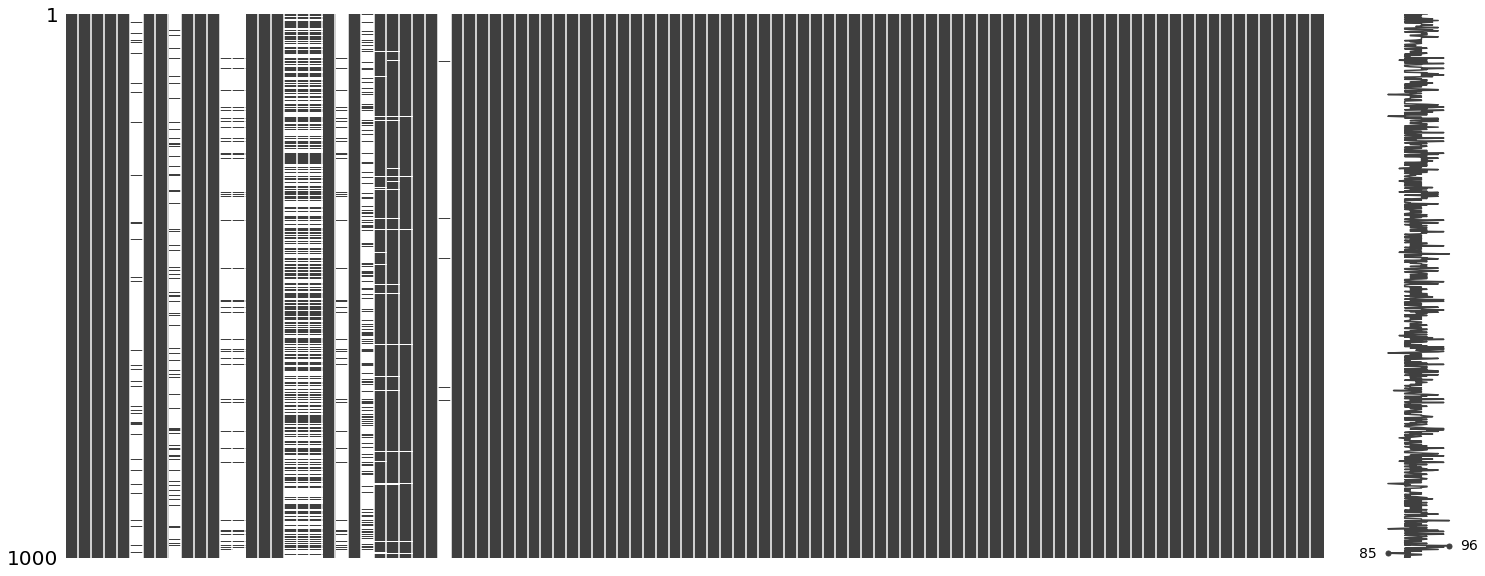

In [82]:
msno.matrix(df.sample(1000))

Tutaj widzę które brakujące wartości są ze sobą powiązane. Tzn. jeśli nie ma "major industry code" to nie ma również "major occupation code". Co ciekawe istnieje ujemna korelacja dla "famili member under 18". Trzeba to zbadać.

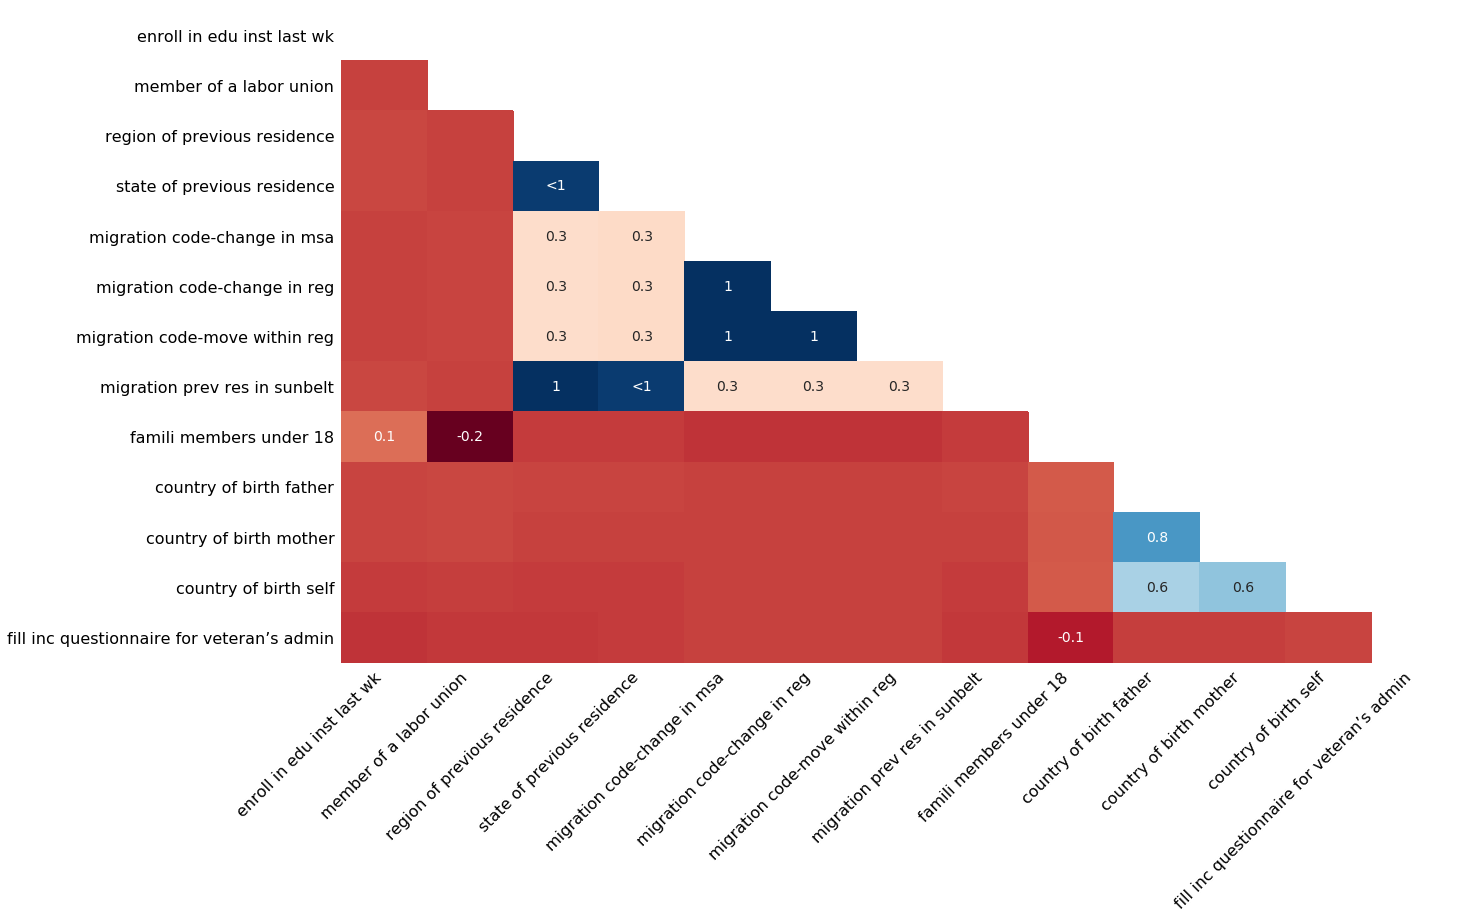

In [83]:
msno.heatmap(df)

In [ ]:
df.skew(), df.kurt()

In [ ]:
df.info()

Ile pustych rekordów dla kategorycznych rekordów:

In [ ]:
cat_df = df.select_dtypes(include=['object', 'category']).copy()
cat_df.isnull().sum()

In [99]:
education_count = cat_df['education'].value_counts()
reversed_education_mapping = {v:k for k, v in education_mapping.items()}
edu = [v for k, v in reversed_education_mapping.items()]
reversed_education_mapping
# education_count.index
# education_mapping[education_count.index]

{0: ' Children',
 1: ' Less than 1st grade',
 2: ' 1st 2nd 3rd or 4th grade',
 3: ' 5th or 6th grade',
 4: ' High school graduate',
 5: ' 7th and 8th grade',
 6: ' 9th grade',
 7: ' 10th grade',
 8: ' 11th grade',
 9: ' 12th grade no diploma',
 10: ' Some college but no degree',
 11: ' Bachelors degree(BA AB BS)',
 12: ' Masters degree(MA MS MEng MEd MSW MBA)',
 13: ' Associates degree-occup /vocational',
 14: ' Associates degree-academic program',
 15: ' Doctorate degree(PhD EdD)',
 16: ' Prof school degree (MD DDS DVM LLB JD)'}

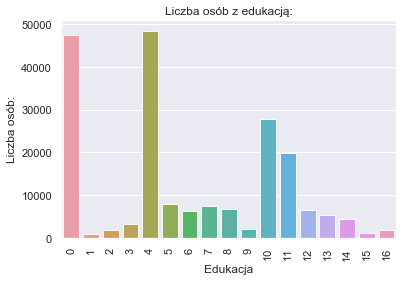

In [101]:

education_count = cat_df['education'].value_counts()
sns.set(style='darkgrid')
sns.barplot(education_count.index, education_count.values, alpha=0.9)
plt.title('Liczba osób z edukacją:')
plt.ylabel('Liczba osób:', fontsize=12)
plt.xlabel('Edukacja', fontsize=12)
plt.xticks(rotation=90)
plt.show()

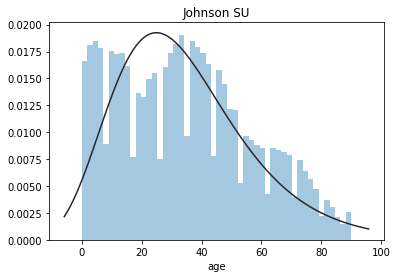

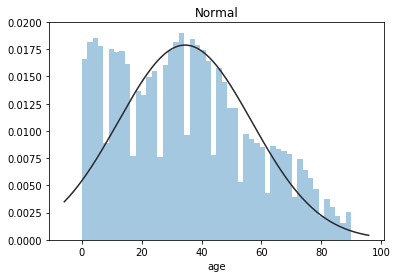

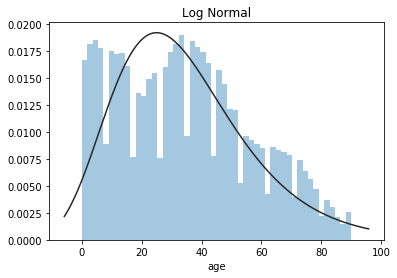

In [48]:
y = df['age']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

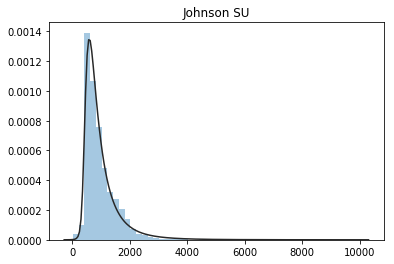

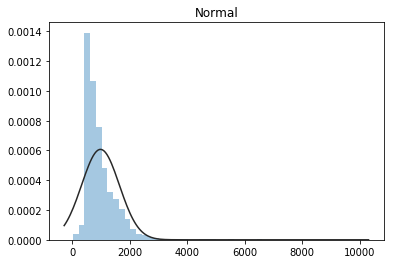

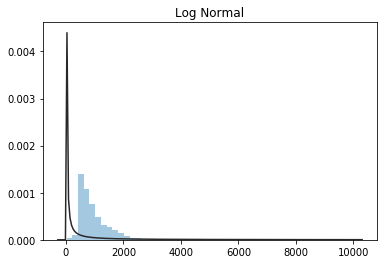

In [50]:
y = [t for t in df['wage per hour'] if t > 0] # rekordy gdzie nie ma zarobkow sa do bani
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

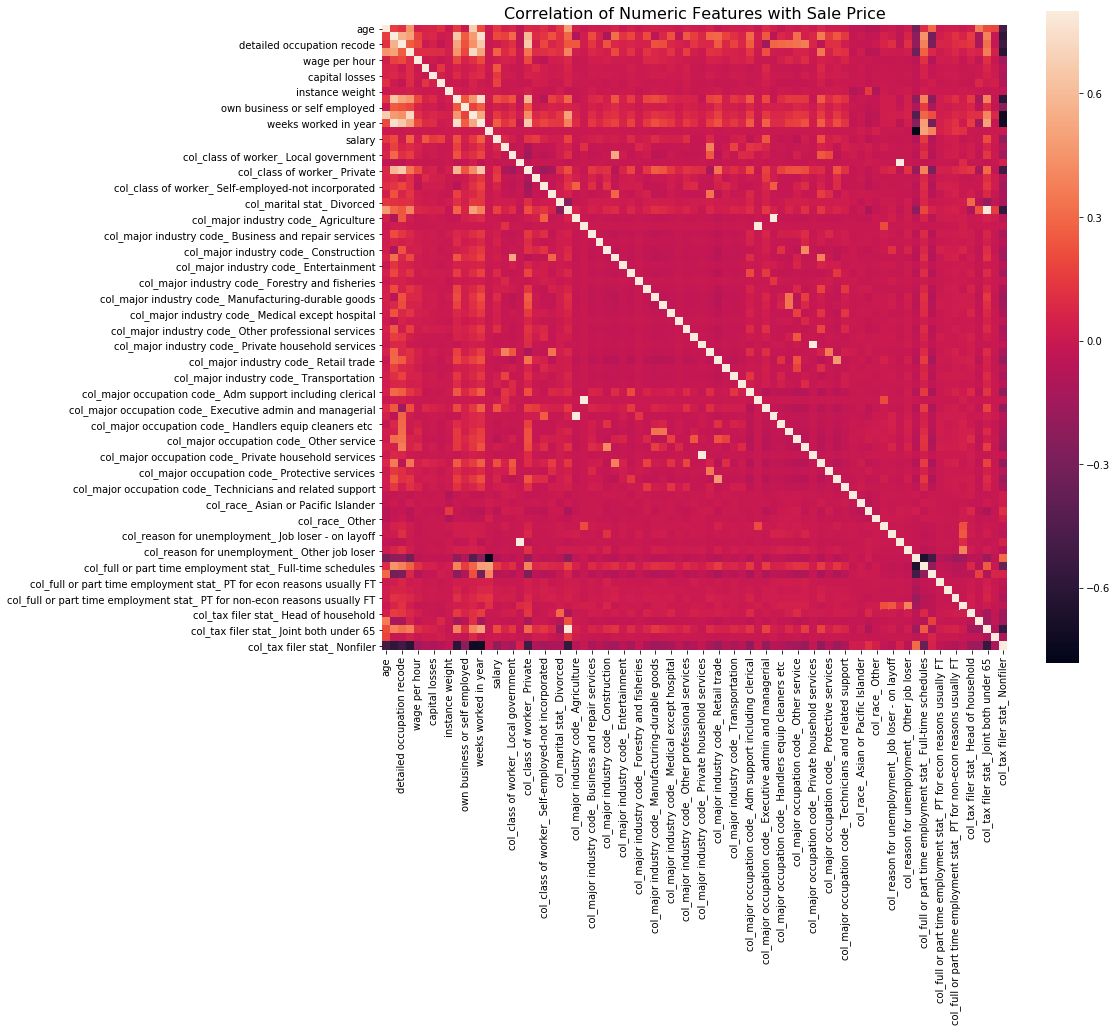

In [81]:
correlation = numerical_features.corr()
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)